## Assignment 1: EDA

1. Read in `income.csv`
2. Convert the target, `SalStat` into a binary numeric variable called `target`, and build a bar chart that plots the frequency of each value.
3. Explore the numeric features using histograms or boxplots.
4. Explore the categorical features using bar charts.
5. Consider writing functions for steps 3 and 4.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

income = pd.read_csv("../Data/income.csv")
income.head()

,age,JobType,EdType,maritalstatus,occupation,relationship,race,gender,capitalgain,capitalloss,hoursperweek,nativecountry,SalStat
0,45,Private,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,28,United-States,"less than or equal to 50,000"
1,24,Federal-gov,HS-grad,Never-married,Armed-Forces,Own-child,White,Male,0,0,40,United-States,"less than or equal to 50,000"
2,44,Private,Some-college,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,"greater than 50,000"
3,27,Private,9th,Never-married,Craft-repair,Other-relative,White,Male,0,0,40,Mexico,"less than or equal to 50,000"
4,20,Private,Some-college,Never-married,Sales,Not-in-family,White,Male,0,0,35,United-States,"less than or equal to 50,000"


<Axes: xlabel='target'>

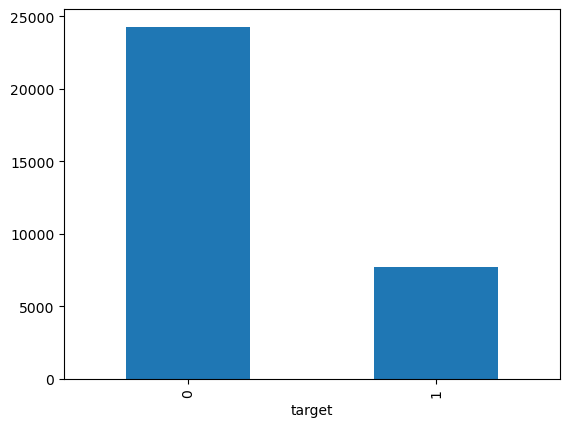

In [2]:
income["target"] = np.where(income['SalStat'] == " less than or equal to 50,000", 0, 1) # leading "space"
income["target"].value_counts().plot.bar()

In [3]:
def num_box_plotter(data):
    for column in data.select_dtypes('number'):
        sns.boxplot(data[column]).set(ylabel=column)
        plt.show()

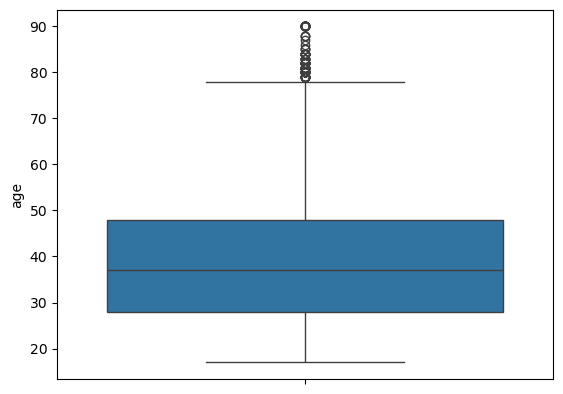

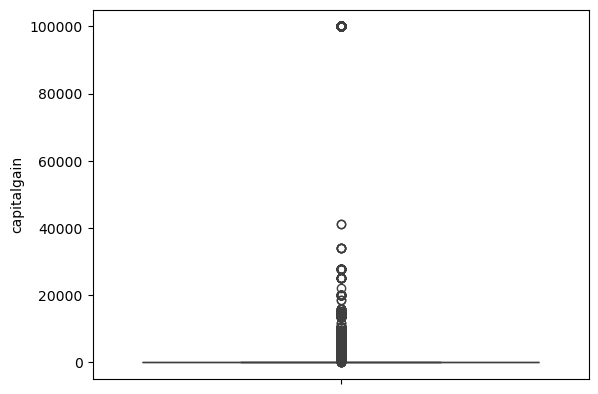

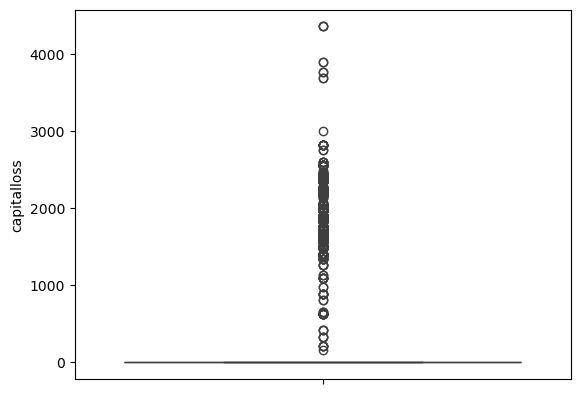

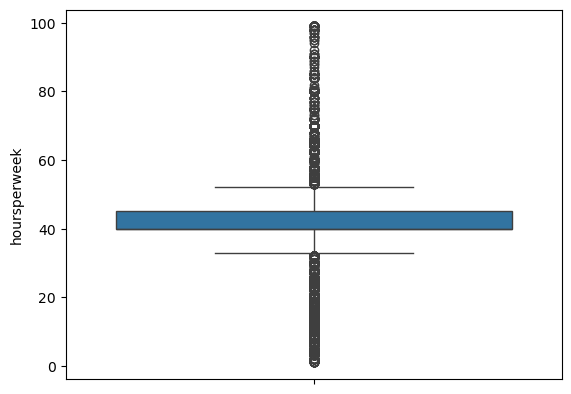

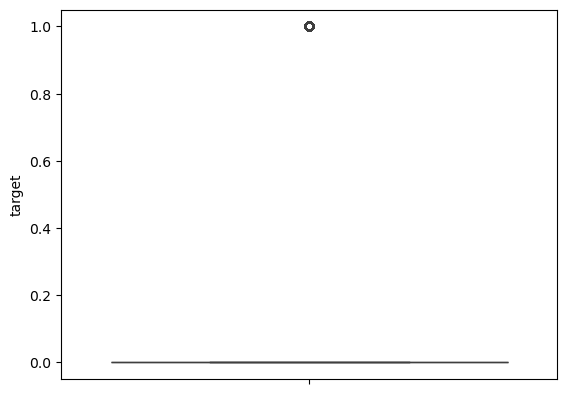

In [4]:
num_box_plotter(income)

In [5]:
def cat_bar_plotter(data, normalize=False):
    for column in data.select_dtypes('object'):
        data[column].value_counts(normalize=normalize).plot.bar()
        plt.show()

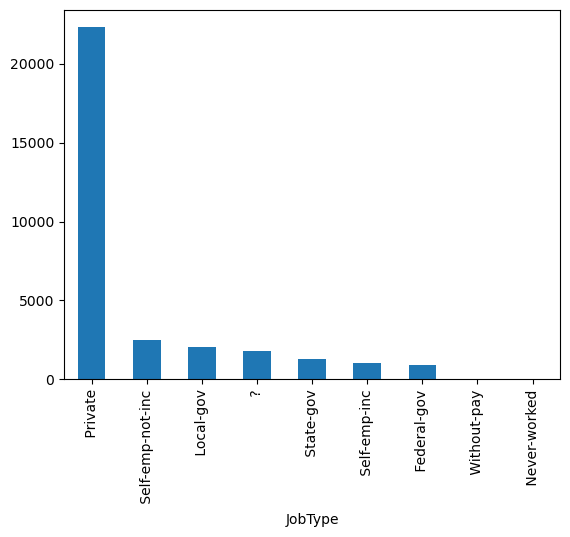

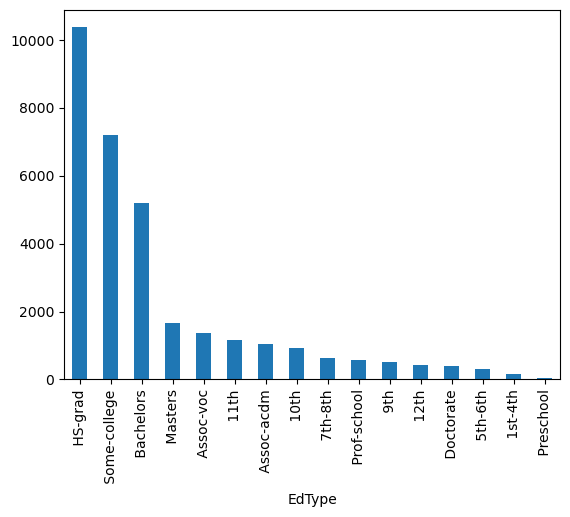

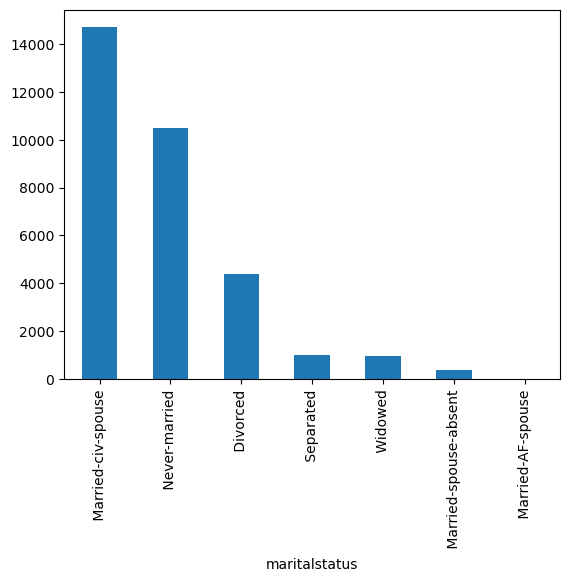

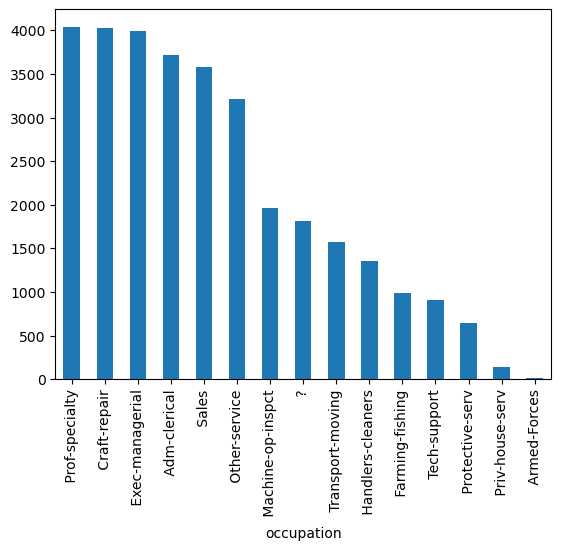

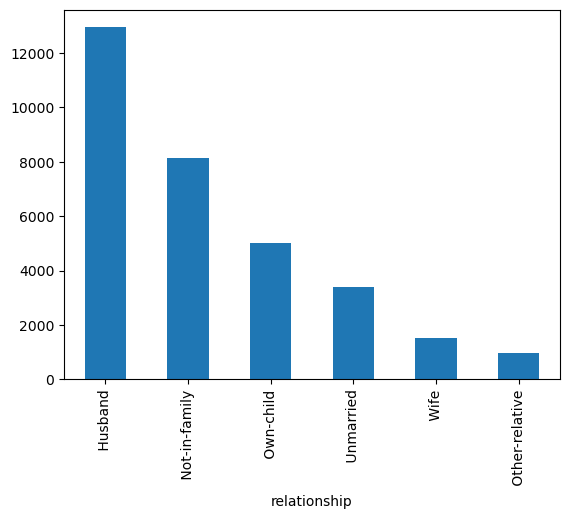

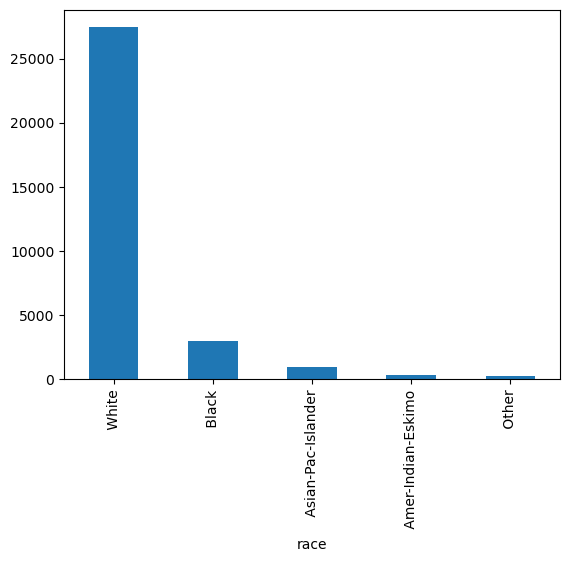

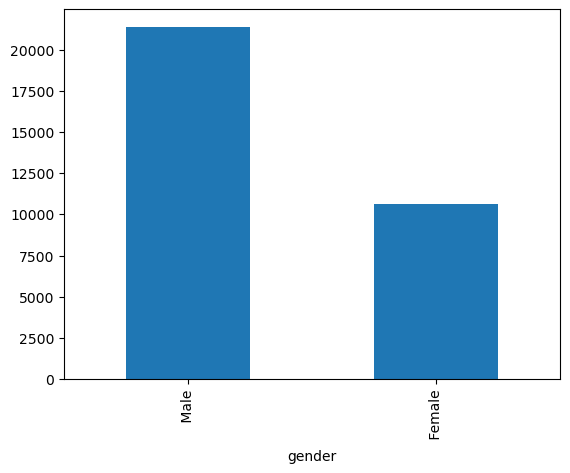

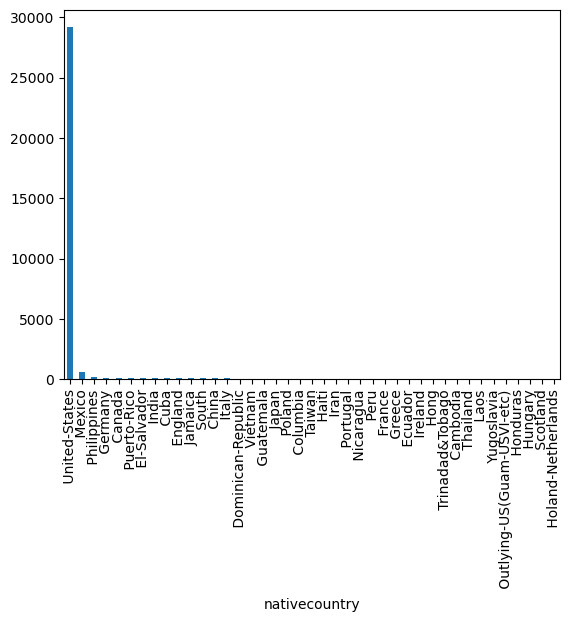

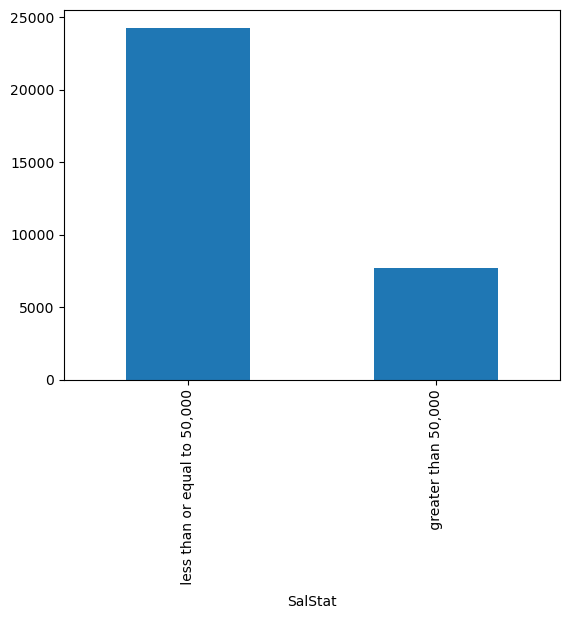

In [6]:
cat_bar_plotter(income)

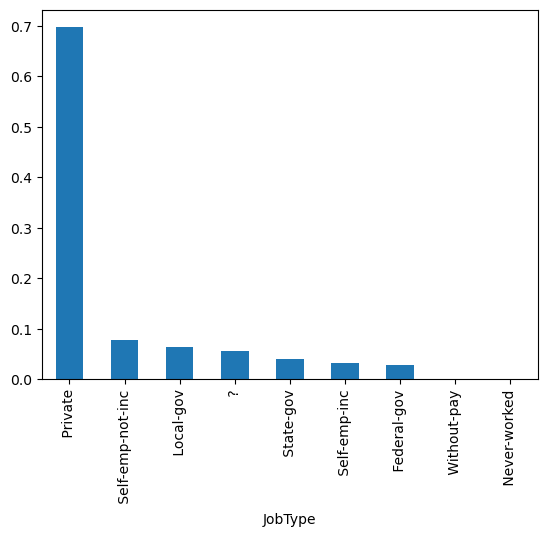

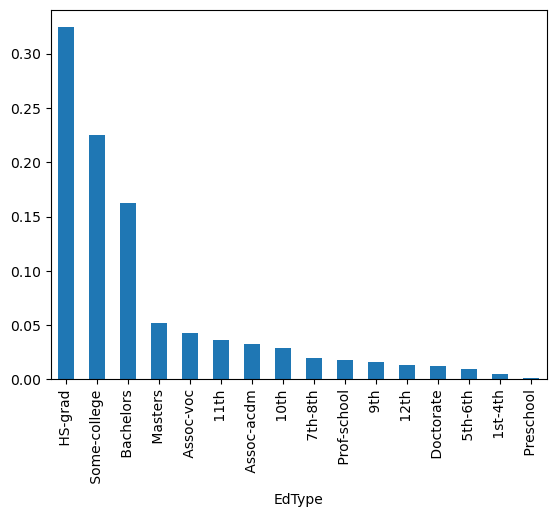

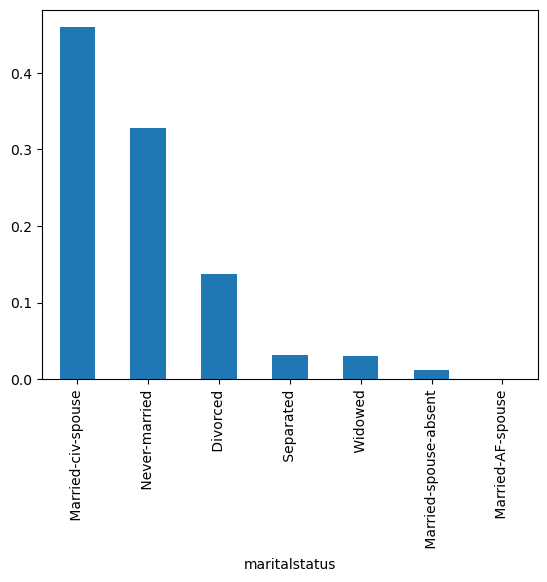

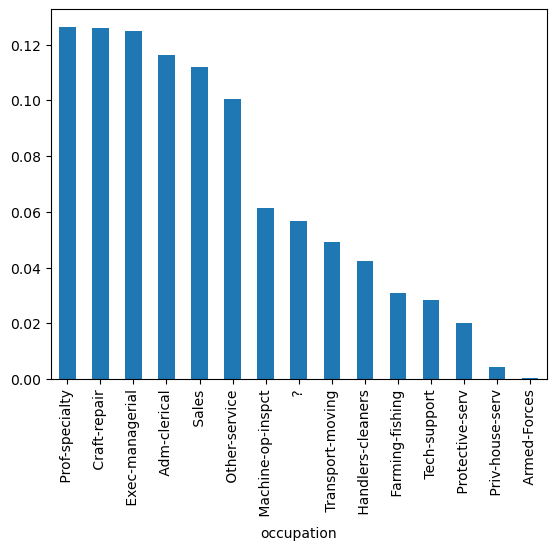

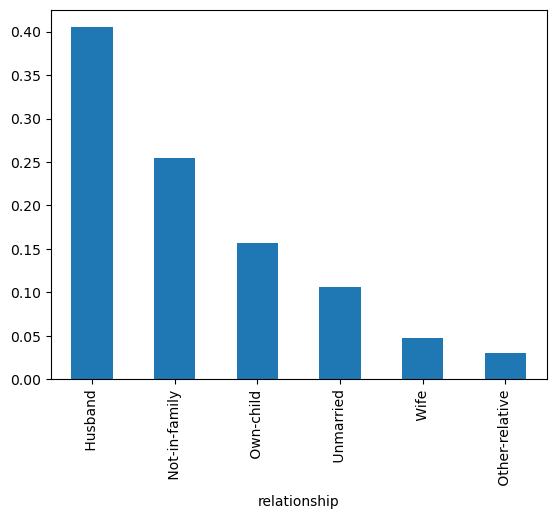

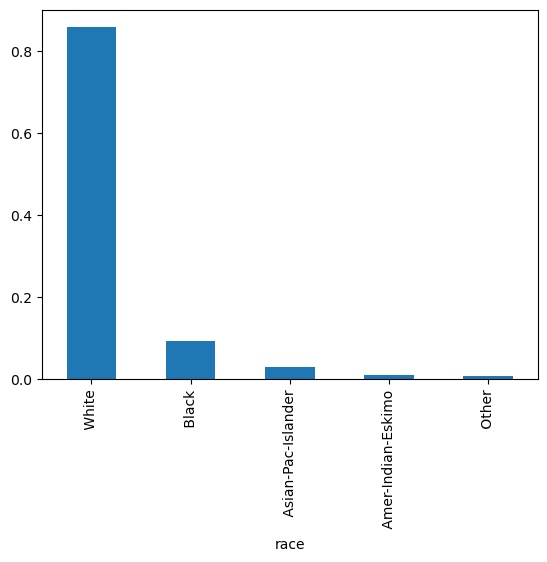

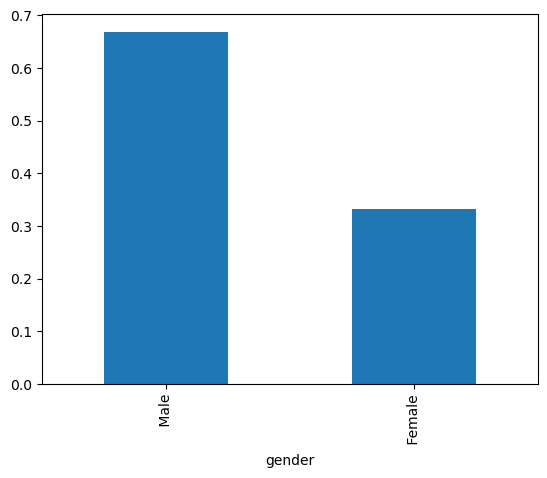

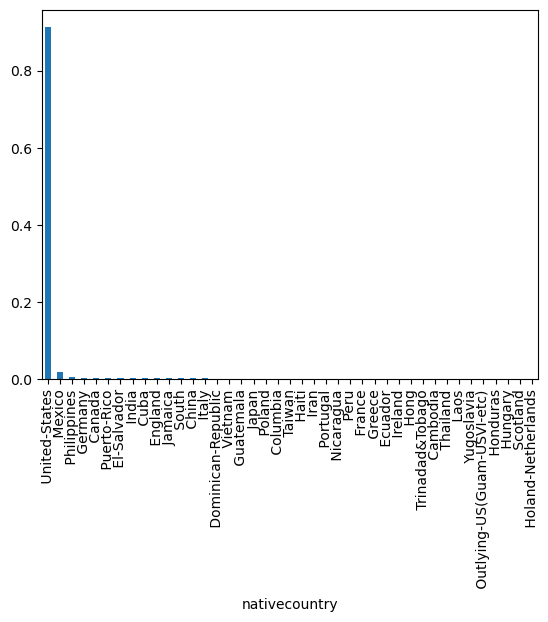

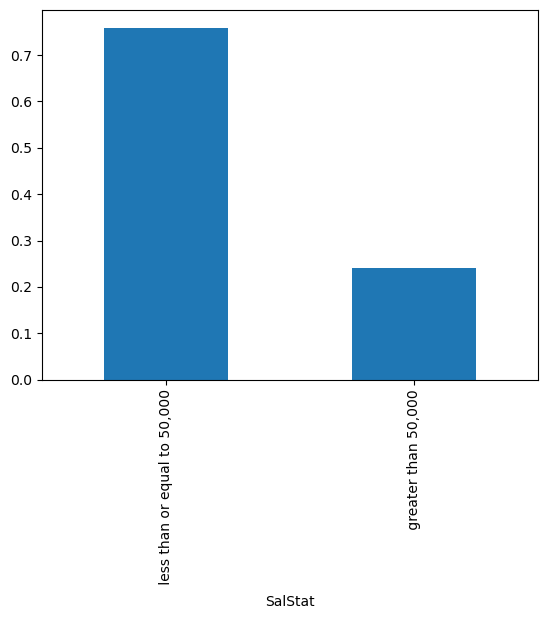

In [7]:
cat_bar_plotter(income, normalize=True)

## Assignment 2: Exploring Relationships

1. Build a Correlation Matrix Heatmap
2. Build a Pairplot
3. Write a function that calculates the mean target rate for each level of categorical variables.

<Axes: >

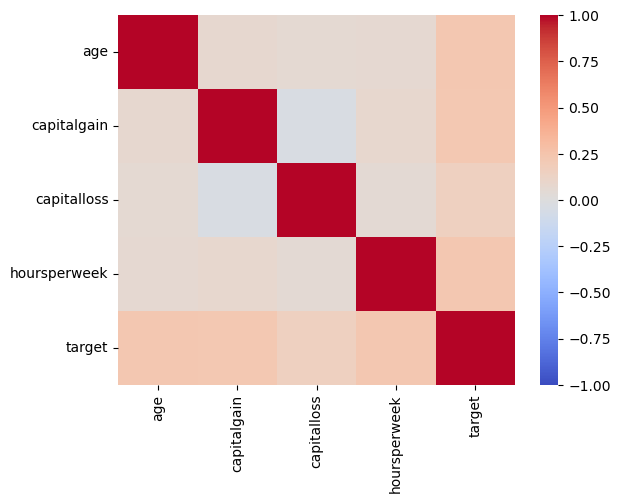

In [8]:
sns.heatmap(income.corr(numeric_only=True), vmin=-1, vmax=1, cmap='coolwarm')

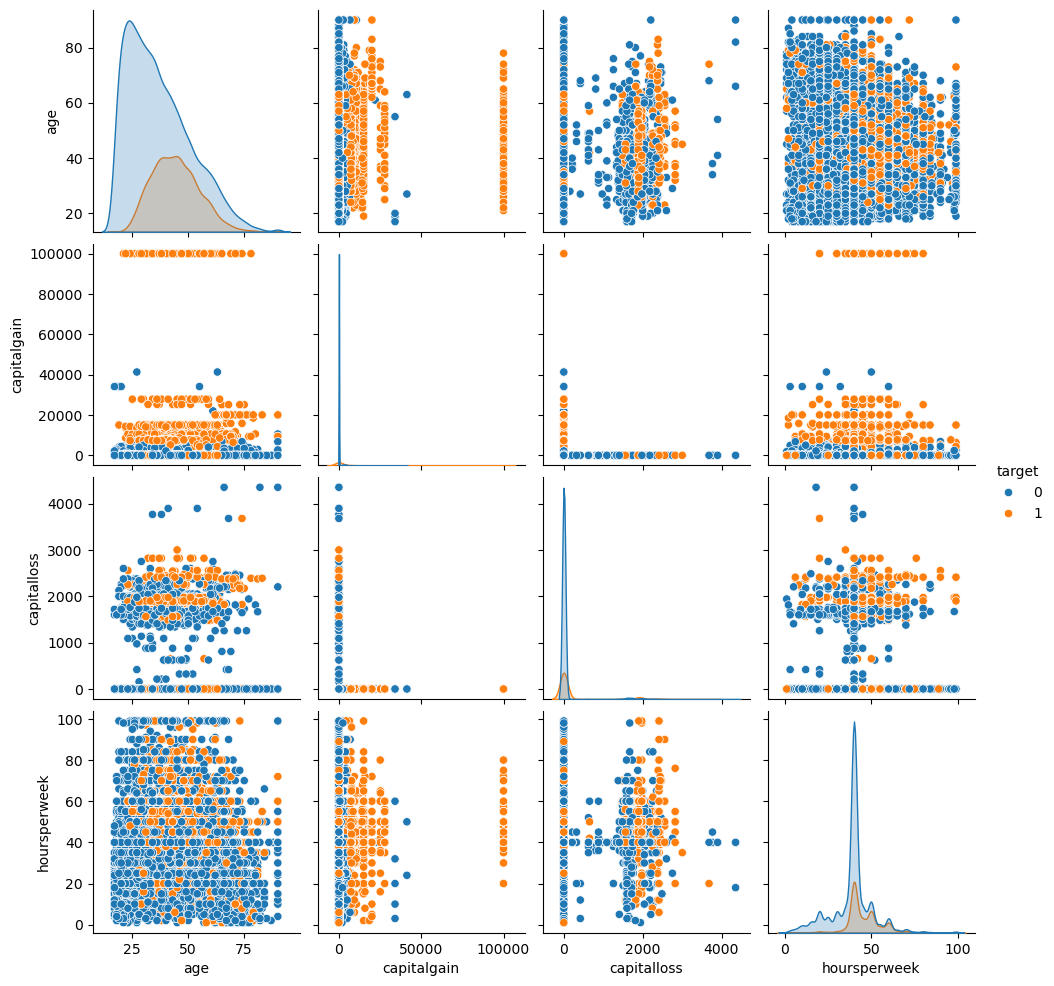

In [9]:
sns.pairplot(income, hue='target')

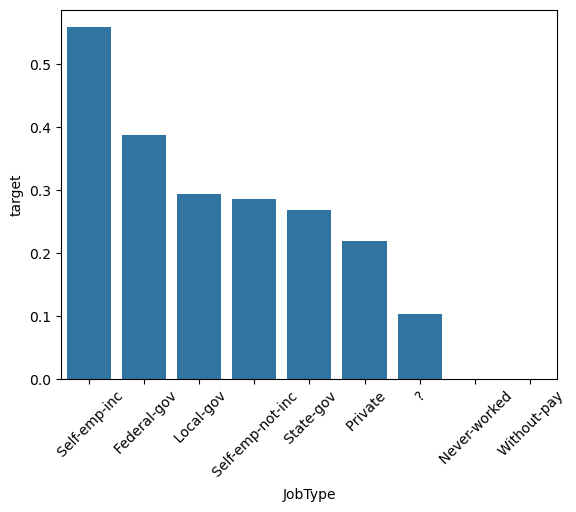

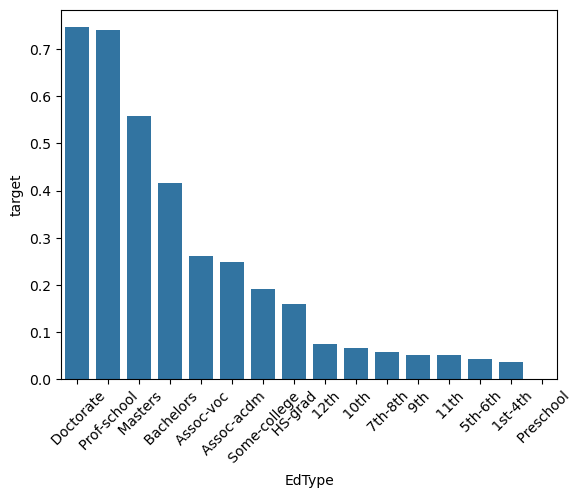

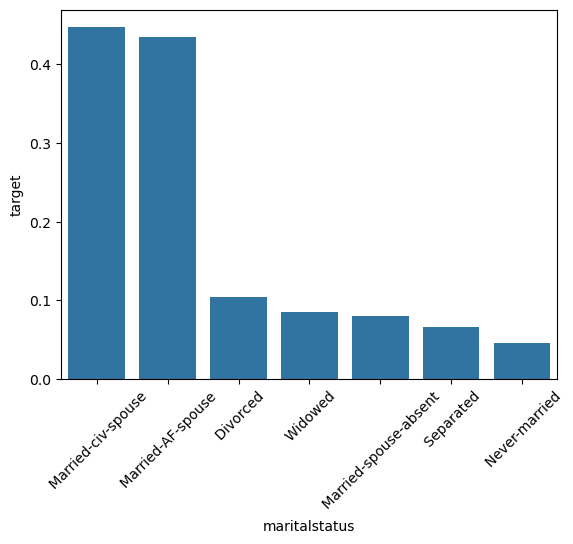

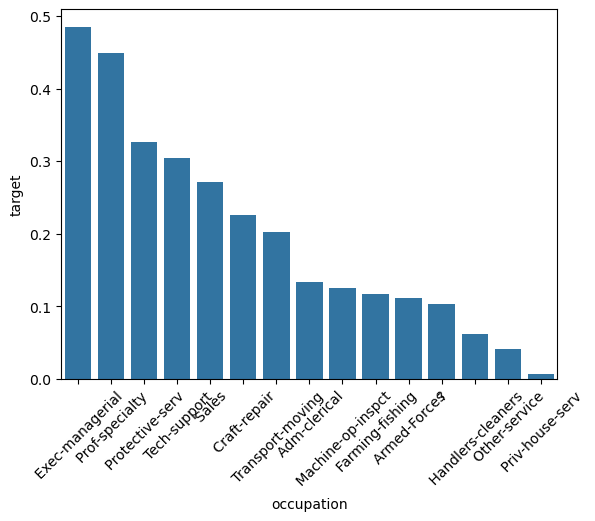

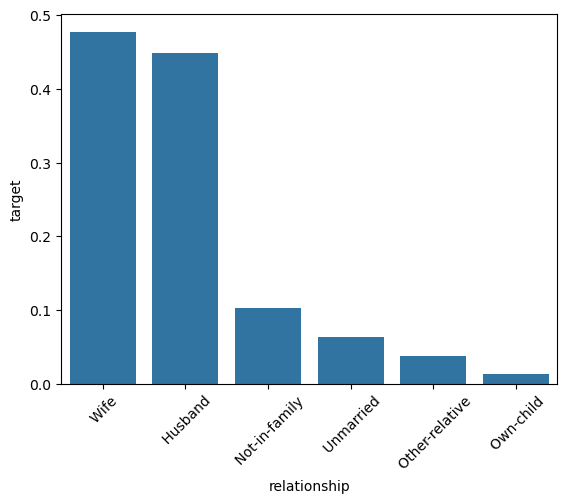

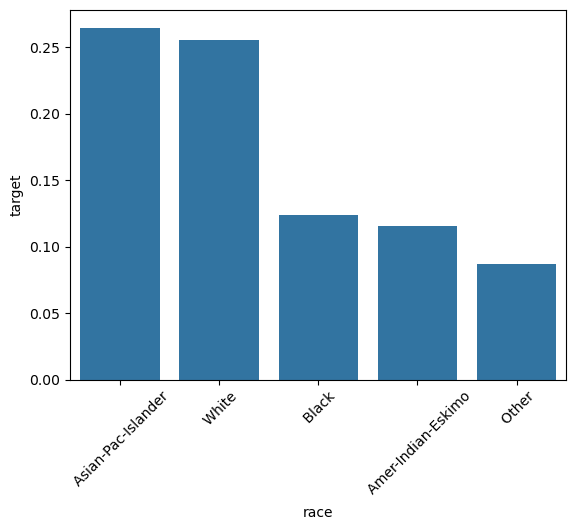

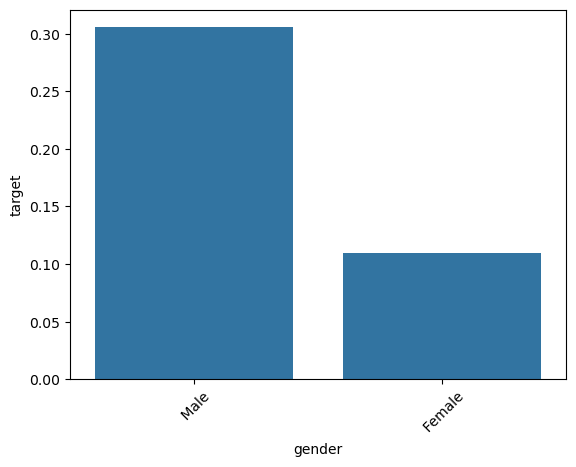

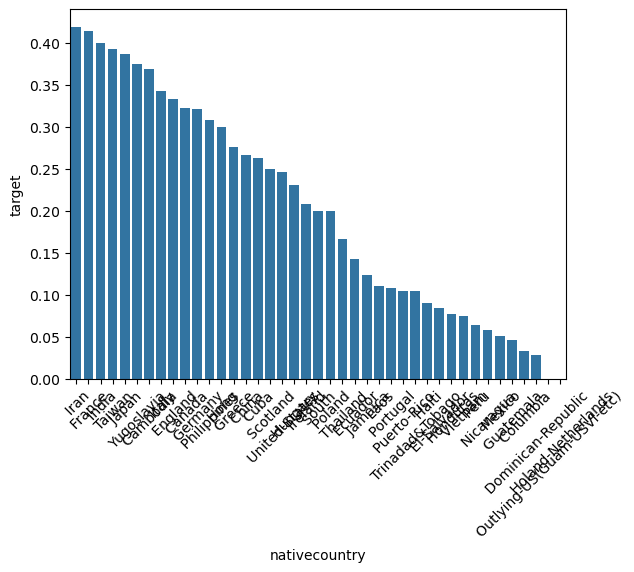

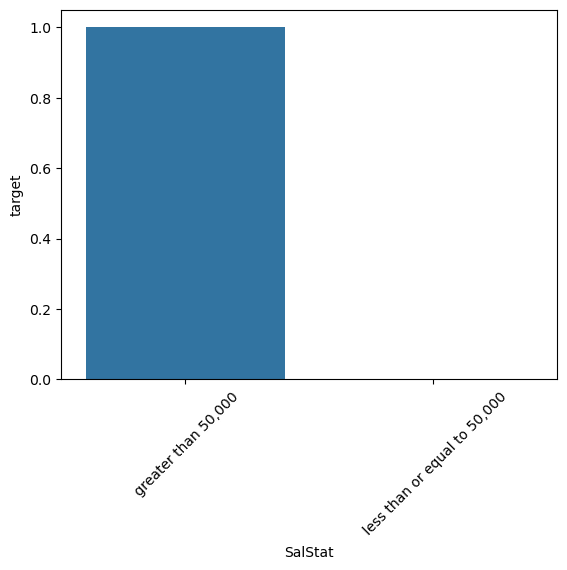

In [10]:
def cat_plotter(data, target):
    for col in data.select_dtypes(['object']).columns:
        sns.barplot(
            data=(
                data
                .groupby(col, as_index=False)
                .agg({'target': 'mean'})
                .sort_values(by='target', ascending=False)
            ),
            x=col,
            y=target
        )

        plt.xticks(rotation=45)
        plt.show()

cat_plotter(income, 'target')

## Assignment 3: Data Prep

1. Create Dummy Variables for the categorical features - check value counts to determine if any categories need to be grouped. If there are less than 10 rows in a category, group it with a larger one.
2. Split off 20% of the data to hold out as a test set, and use the rest for training. There should be 4 datasets, one each for the features and target for the train and test sets.

In [12]:
def value_counter(dataframe):
    for col in dataframe.select_dtypes(['object']).columns:
        print(dataframe[col].value_counts())

value_counter(income)

JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            14
Never-worked            7
Name: count, dtype: int64
EdType
HS-grad         10368
Some-college     7187
Bachelors        5210
Masters          1674
Assoc-voc        1366
11th             1167
Assoc-acdm       1055
10th              921
7th-8th           627
Prof-school       559
9th               506
12th              417
Doctorate         390
5th-6th           318
1st-4th           163
Preschool          50
Name: count, dtype: int64
maritalstatus
Married-civ-spouse       14692
Never-married            10488
Divorced                  4394
Separated                 1005
Widowed                    979
Married-spouse-absent      397
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
A

In [13]:
# map holland to germany
# map armed forces
# group without-pay and never-worked

income = income.assign(
    nativecountry = income["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
    occupation = income["occupation"].replace({" Armed-Forces": " ?"}),
    JobType = income["JobType"].replace({" Never-worked": " Without-pay"}),
)

value_counter(income)

JobType
Private             22286
Self-emp-not-inc     2499
Local-gov            2067
?                    1809
State-gov            1279
Self-emp-inc         1074
Federal-gov           943
Without-pay            21
Name: count, dtype: int64
EdType
HS-grad         10368
Some-college     7187
Bachelors        5210
Masters          1674
Assoc-voc        1366
11th             1167
Assoc-acdm       1055
10th              921
7th-8th           627
Prof-school       559
9th               506
12th              417
Doctorate         390
5th-6th           318
1st-4th           163
Preschool          50
Name: count, dtype: int64
maritalstatus
Married-civ-spouse       14692
Never-married            10488
Divorced                  4394
Separated                 1005
Widowed                    979
Married-spouse-absent      397
Married-AF-spouse           23
Name: count, dtype: int64
occupation
Prof-specialty       4038
Craft-repair         4030
Exec-managerial      3992
Adm-clerical         3721
S

In [14]:
income = pd.get_dummies(income, drop_first=True)
income.head()

,age,capitalgain,capitalloss,hoursperweek,target,JobType_ Federal-gov,JobType_ Local-gov,JobType_ Private,JobType_ Self-emp-inc,JobType_ Self-emp-not-inc,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,"SalStat_ less than or equal to 50,000"
0,45,0,0,28,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True
1,24,0,0,40,0,True,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
2,44,0,0,40,1,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,False
3,27,0,0,40,0,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,True
4,20,0,0,35,0,False,False,True,False,False,...,False,False,False,False,False,False,True,False,False,True


In [15]:
income.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31978 entries, 0 to 31977
Data columns (total 96 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   age                                        31978 non-null  int64
 1   capitalgain                                31978 non-null  int64
 2   capitalloss                                31978 non-null  int64
 3   hoursperweek                               31978 non-null  int64
 4   target                                     31978 non-null  int32
 5   JobType_ Federal-gov                       31978 non-null  bool 
 6   JobType_ Local-gov                         31978 non-null  bool 
 7   JobType_ Private                           31978 non-null  bool 
 8   JobType_ Self-emp-inc                      31978 non-null  bool 
 9   JobType_ Self-emp-not-inc                  31978 non-null  bool 
 10  JobType_ State-gov                         319

In [16]:
X = data.drop('target', axis=1)
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2023)

NameError: name 'data' is not defined

In [17]:
def income_model_prep(data):
    from sklearn.model_selection import train_test_split
    data = pd.get_dummies(
        data.assign(
            target = np.where(data["SalStat"] == " less than or equal to 50,000", 0, 1),
            nativecountry = data["nativecountry"].replace({" Holand-Netherlands": " Germany"}),
            occupation = data["occupation"].replace({" Armed-Forces": " ?"}),
            JobType = data["JobType"].replace({" Never-worked": " Without-pay"}),
        ).drop("SalStat", axis=1), 
        drop_first=True
    )
    X = data.drop("target", axis=1)
    y = data["target"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
    return X_train, X_test, y_train, y_test

In [ ]:
income = pd.read_csv('Data/income.csv')

# X_train, X_test, y_train, y_test = income_model_prep(income)

In [ ]:
X_train.info()